# Oscillator

## Simple Harmonic motion

$\ddot{x}(t) = - \frac{k}{m}x(t)$

### Euler's Method

In [2]:
import numpy as np

Nt = 1000
t = np.linspace(0, 10, Nt+1)
x = np.zeros_like(t)
v = np.zeros_like(t)

k = 10.
m = 1.
a = -k/m

# Initial conditions
x[0] = 0.1
v[0] = 0

# Euler function
dt = t[1] - t[0]
for i in range(0, Nt):
    v[i+1] = v[i] + a * dt * x[i]
    x[i+1] = x[i] + v[i] * dt


In [1]:
# Nice Plotting function with animation
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


# Create a figure and axes
def create_fig(t, x, v):
    fig = plt.figure(figsize=(12,5))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)

    # set up the subplots as needed
    ax1.set_xlim((np.min(t), np.max(t)))
    ax1.set_ylim((np.min(x), np.max(x)))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position')

    ax2.set_xlim((np.min(x), np.max(x)))
    ax2.set_ylim((np.min(v), np.max(v)))
    ax2.set_xlabel('x')
    ax2.set_ylabel('v')
    ax2.set_title('Phase Space')

    # create objects that will change in the animation. These are
    # initially empty, and will be given new values for each frame
    # in the animation.
    line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
    line2, = ax2.plot([], [], 'r', lw=2)
    pt2, = ax2.plot([], [], 'g.', ms=20)
    return fig, ax1, ax2, line1, line2, pt2

# Animation function. This is called sequentially
def drawframe(n, t, x, v, nframes=100):
    samp = int(len(t) / nframes)
    t_n = t[:samp * (n + 1)]
    x_n = x[:samp * (n + 1)]
    v_n = v[:samp * (n + 1)]
    line1.set_data(t_n, x_n)
    line2.set_data(x_n, v_n)
    pt2.set_data([x_n[-1]],[v_n[-1]])
    return (line1,line2)

# blit=True re-draws only the parts that have changed.
#anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
#HTML(anim.to_html5_video())


In [ ]:
fig, ax1, ax2, line1, line2, pt2 = create_fig(t, x, v)

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True, fargs=(t, x, v))
HTML(anim.to_jshtml())


### Modified Euler's Method

In [9]:
Nt = 1000
t = np.linspace(0, 10, Nt+1)
x = np.zeros_like(t)
v = np.zeros_like(t)

k = 10.
m = 1.
a = -k/m

# Initial conditions
x[0] = 0.1
v[0] = 0

# Euler function
dt = t[1] - t[0]
for i in range(0, Nt):
    v[i+1] = v[i] + a * dt * x[i]
    x[i+1] = x[i] + v[i+1] * dt

In [ ]:
fig, ax1, ax2, line1, line2, pt2 = create_fig(t, x, v)

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True, fargs=(t, x, v))
HTML(anim.to_jshtml())


### Built-in Python function: solve_ivp

In [ ]:
from scipy.integrate import solve_ivp

t1 = 0.
t2 = 10.
m = 1.
k = 10.

def f(t, y):
    x, v = y
    return [v, -k/m * x]

sol = solve_ivp(f, t_span=[t[0], t[-1]], t_eval=t, y0=[0.1, 0.])
display(sol)

t = sol.t
x = sol.y[0]
v = sol.y[1]


In [ ]:
fig, ax1, ax2, line1, line2, pt2 = create_fig(t, x, v)

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True, fargs=(t, x, v))
HTML(anim.to_jshtml())


## Damped Harmonic motion

$\ddot{x}(t) = - \frac{k}{m}x(t) - b \dot{x}(t)$

In [16]:
from scipy.integrate import solve_ivp

t1 = 0.
t2 = 10.
m = 1.
k = 10.
b = 1.

def f(t, y):
    x, v = y
    return [v, -k/m * x - b/m * v]

sol = solve_ivp(f, t_span=[t[0], t[-1]], t_eval=t, y0=[0.1, 0.])

t = sol.t
x = sol.y[0]
v = sol.y[1]


In [ ]:
fig, ax1, ax2, line1, line2, pt2 = create_fig(t, x, v)

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True, fargs=(t, x, v))
HTML(anim.to_jshtml())


## Forced Oscillations and Resonances

$\ddot{x}(t) + \frac{k}{m}x(t) = A * \sin(\omega t)$

In [44]:
from scipy.integrate import solve_ivp

t1 = 0.
t2 = 10.
m = 1.
k = 10.
b = 0.1
A = 1.
w = np.sqrt(k/m) / 3.

def f(t, y):
    x, v = y
    return [v, -k/m * x - b/m * v + A * np.sin(w * t) / m]

sol = solve_ivp(f, t_span=[t[0], t[-1]], t_eval=t, y0=[0.1, 0.])

t = sol.t
x = sol.y[0]
v = sol.y[1]


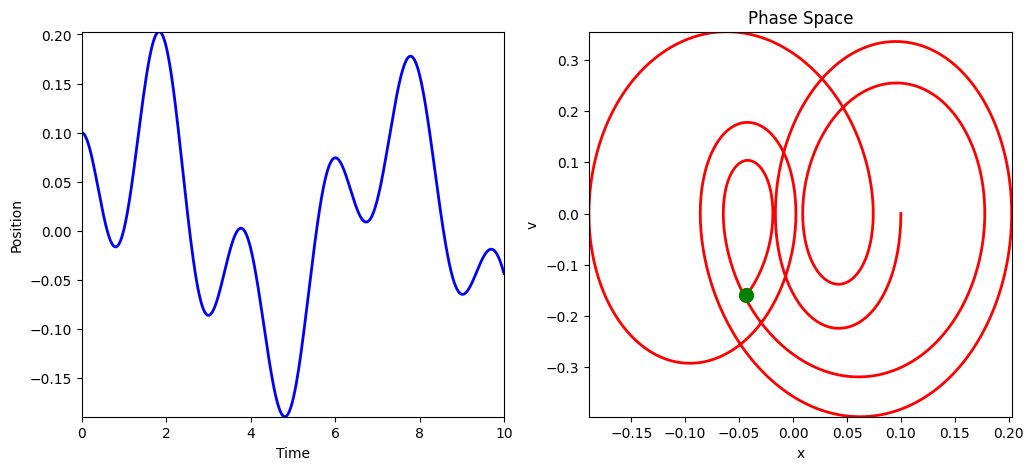

In [45]:
fig, ax1, ax2, line1, line2, pt2 = create_fig(t, x, v)

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True, fargs=(t, x, v))
HTML(anim.to_jshtml())
